In [1]:
import os
import math
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize, signal

from lmfit import models

'images/xrd-fitting-gaussian.png'

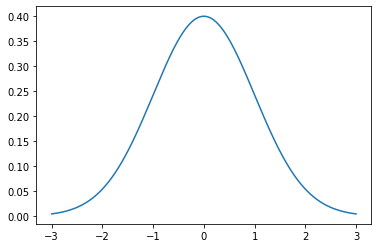

In [2]:
image_dir = "images"
def plot_to_blog(fig, figure_name):
    filename = os.path.expanduser(f'{image_dir}/{figure_name}')
    fig.savefig(filename)
    return filename

def g(x, A, μ, σ):
    return A / (σ * math.sqrt(2 * math.pi)) * np.exp(-(x-μ)**2 / (2*σ**2))

x = np.linspace(-3, 3, 1000)
fig, ax = plt.subplots()
ax.plot(x, g(x, 1, 0, 1))
plot_to_blog(fig, 'xrd-fitting-gaussian.png')

'images/xrd-fitting-unknown.png'

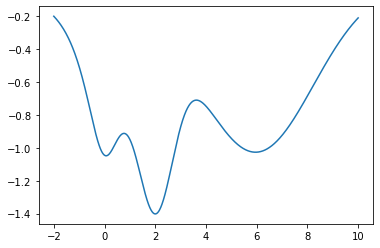

In [3]:
def f(x):
    return np.exp(-(x-2)**2) + np.exp(-(x-6)**2/10) + 1/(x**2 + 1)

x = np.linspace(-2, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, -f(x))
plot_to_blog(fig, 'xrd-fitting-unknown.png')

In [4]:
print('|{:>16}|{:>16}|{:>16}|'.format('initial','iterations','minimum'))
initial_guess = -0.5
result = optimize.minimize(lambda x: -f(x), [initial_guess])
print(f'|{initial_guess:+16.1f}|{result.nit:>16}|{result.x[0]:16.3f}|')

initial_guess = -2
result = optimize.minimize(lambda x: -f(x), [initial_guess])
print(f'|{initial_guess:+16.1f}|{result.nit:>16}|{result.x[0]:16.3f}|')

initial_guess = 9
result = optimize.minimize(lambda x: -f(x), [initial_guess])
print(f'|{initial_guess:+16.1f}|{result.nit:>16}|{result.x[0]:16.3f}|')

|         initial|      iterations|         minimum|
|            -0.5|               5|           0.064|
|            -2.0|               4|           2.001|
|            +9.0|               3|           5.955|
